# Análise dos Voos que não justificaram os atrasos

## Importando Bibliotecas

In [30]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregando o Banco de Dados

In [32]:
original = pd.read_csv('DelayedFlights.zip')

In [33]:
# Total de Registros
Total_Registros = len(original)

In [34]:
df= pd.read_csv('voos_sem_atraso_justificado.zip')

In [35]:
df.shape

(680881, 11)

In [36]:
df.nunique()

Month                  12
DayofMonth             31
DayOfWeek               7
ActualElapsedTime     629
CRSElapsedTime        484
AirTime               616
ArrDelay               84
DepDelay               72
Origin                301
Dest                  301
Distance             1380
dtype: int64

Verificar a quantidade de linhas com valores nulos

In [37]:
df.isnull().sum().sort_values(ascending=False)

Month                0
DayofMonth           0
DayOfWeek            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
dtype: int64

In [38]:
df.describe()

,Month,DayofMonth,DayOfWeek,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
count,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000,680881.000000
mean,6.185651,15.800836,3.994011,129.509851,138.656770,109.847371,3.557158,12.704079,807.754246
std,3.427159,8.746152,2.001106,71.469531,74.042342,69.464582,7.836563,6.415863,597.213848
min,1.000000,1.000000,1.000000,15.000000,24.000000,1.000000,-109.000000,6.000000,30.000000
25%,3.000000,8.000000,2.000000,76.000000,84.000000,58.000000,-1.000000,8.000000,361.000000
50%,6.000000,16.000000,4.000000,112.000000,120.000000,92.000000,5.000000,11.000000,641.000000
75%,9.000000,23.000000,6.000000,160.000000,170.000000,139.000000,10.000000,16.000000,1048.000000
max,12.000000,31.000000,7.000000,664.000000,660.000000,631.000000,14.000000,96.000000,4962.000000


In [39]:
# os registros com valores nulos e negativos de ArrDelay foram analisados no arquivo 'analise_adiantados.ipynb'
df=df[df['ArrDelay']>0]

In [40]:
# Total de Cancelamentos
Total_sem_atr_just = len(df)

In [41]:
print(f'A Porcentagem de voos cancelados em 2008: {round(100*Total_sem_atr_just/Total_Registros,4)}%')

A Porcentagem de voos cancelados em 2008: 24.5733%


Devido a grande distância entre o quartil de 75% e o valor máximo do DepDelay, foram retirados registros acima do quantil de 95%

In [42]:
# Calcular o quantil de 95%
quantil_95 = df['DepDelay'].quantile(0.95)

# Aplicar o filtro
df  = df.loc[df['DepDelay'] <= quantil_95]

Levando em consideração que o campo AirTime indica o tempo no ar em minutos, não faz sentido que um voo dure apenas uns minutos no ar. Por isso, será retirado os primeiro 5% dos dados de AirTime

In [43]:
# Calcular o quantil de 5%
quantil_5 = df['AirTime'].quantile(0.05)

# Aplicar o filtro
df  = df.loc[df['AirTime'] >= quantil_5]

In [44]:
lista_var_continuas = ['ActualElapsedTime','CRSElapsedTime', 
                       'AirTime','ArrDelay','DepDelay','Distance']
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']

# verificando novamente
df[lista_var_continuas].describe()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance
count,435512.000000,435512.000000,435512.000000,435512.000000,435512.000000,435512.000000
mean,123.899865,129.225284,103.713349,7.560726,12.886150,741.983690
std,65.885507,66.326414,63.650422,3.923283,5.348385,538.424819
min,37.000000,34.000000,32.000000,1.000000,6.000000,64.000000
25%,76.000000,80.000000,57.000000,4.000000,8.000000,348.000000
50%,106.000000,111.000000,86.000000,8.000000,12.000000,590.000000
75%,152.000000,157.000000,130.000000,11.000000,16.000000,957.000000
max,664.000000,660.000000,631.000000,14.000000,27.000000,4962.000000


Correlação utilizando o pairplot

<Figure size 1000x600 with 0 Axes>

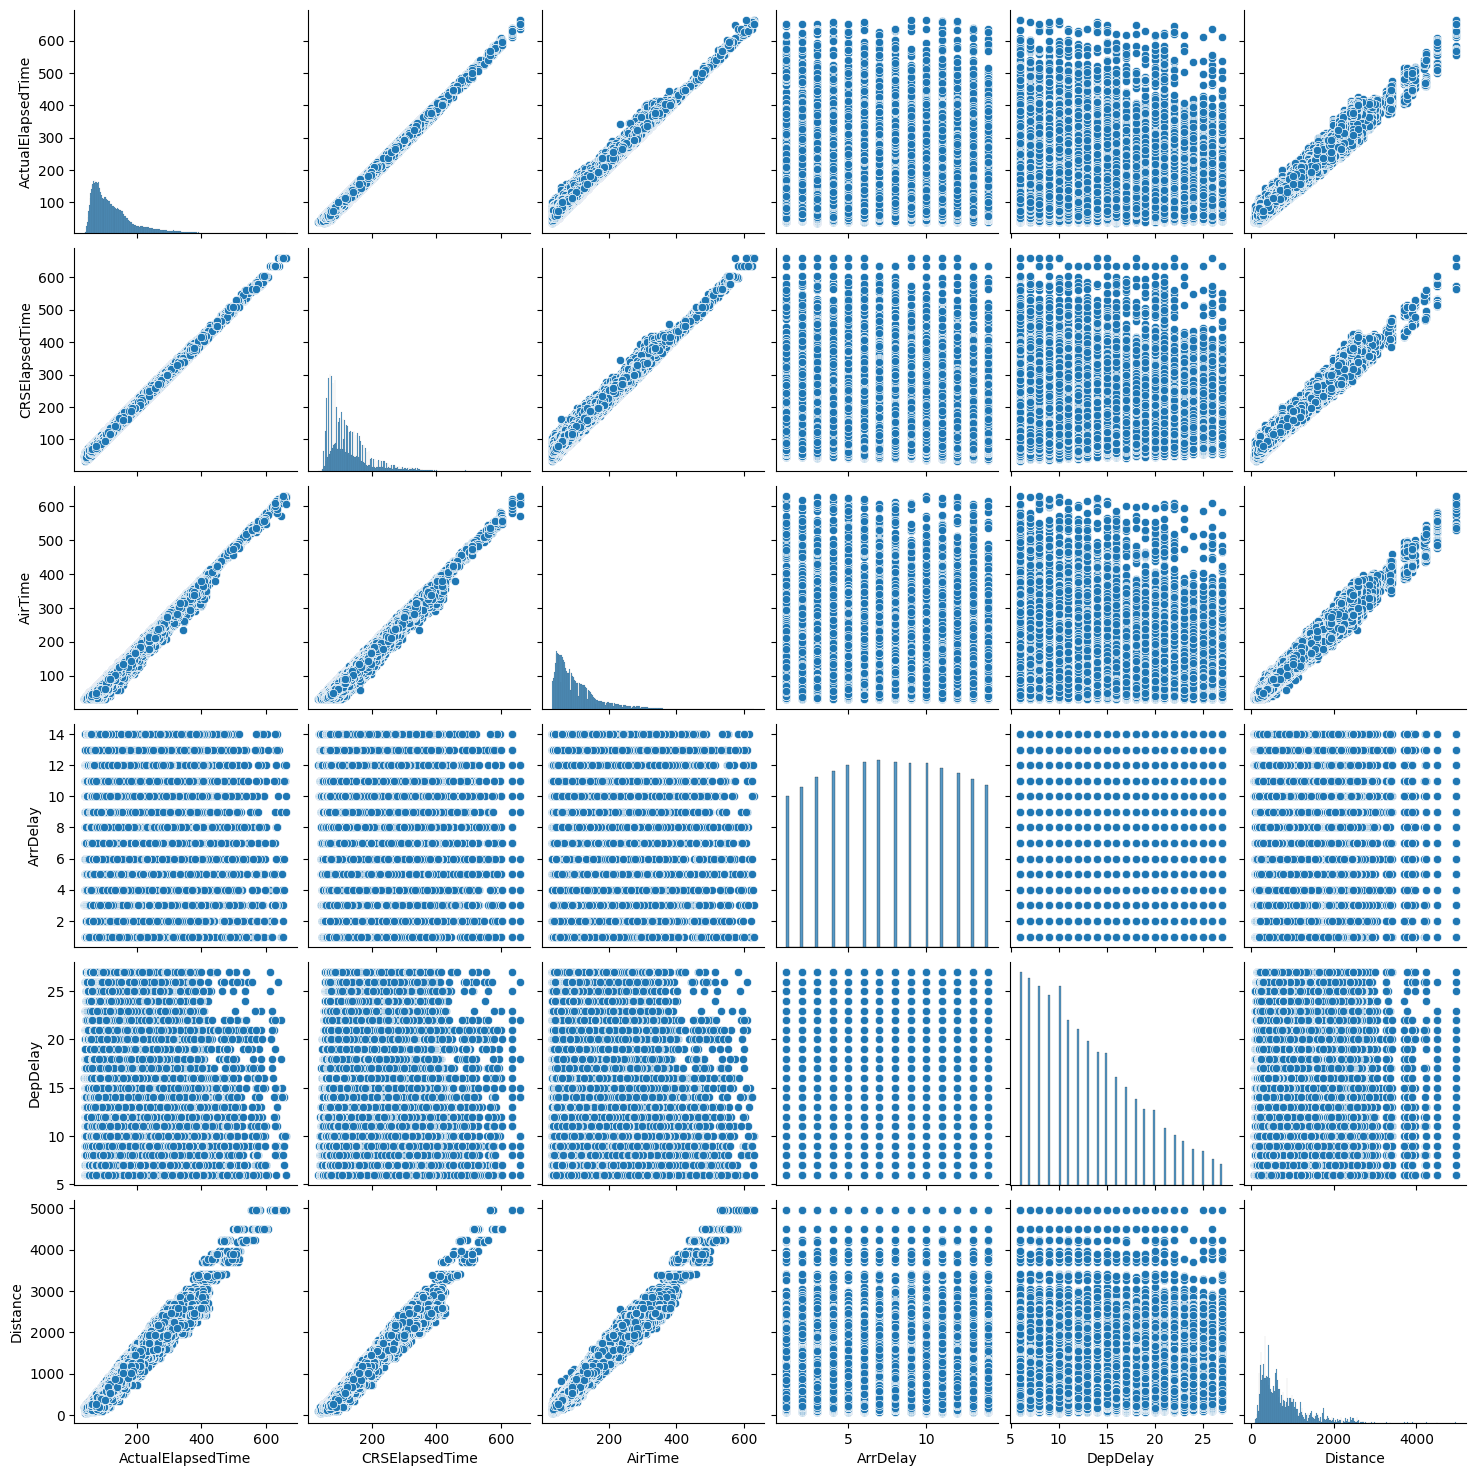

In [45]:
#Possível observar o tipo de correlação entre as variaveis 
#Demora um pouco para plotar
plt.figure(figsize=(10, 6))
sns.pairplot(df[lista_var_continuas])
plt.show() 

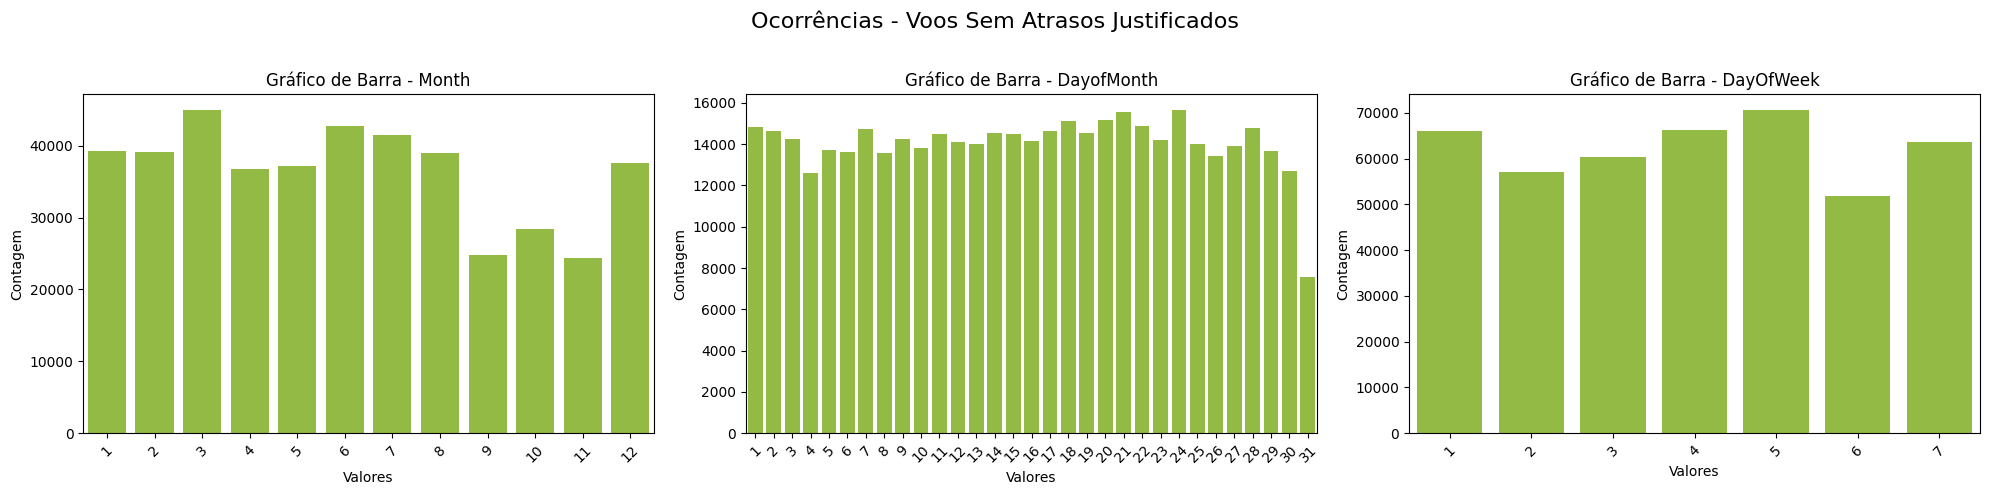

In [46]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=df[[i]], ax=ax, color='YellowGreen')
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')

    # Ajusta a rotação dos rótulos para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - Voos Sem Atrasos Justificados', fontsize=16)
# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

# Exibe a figura
plt.show()

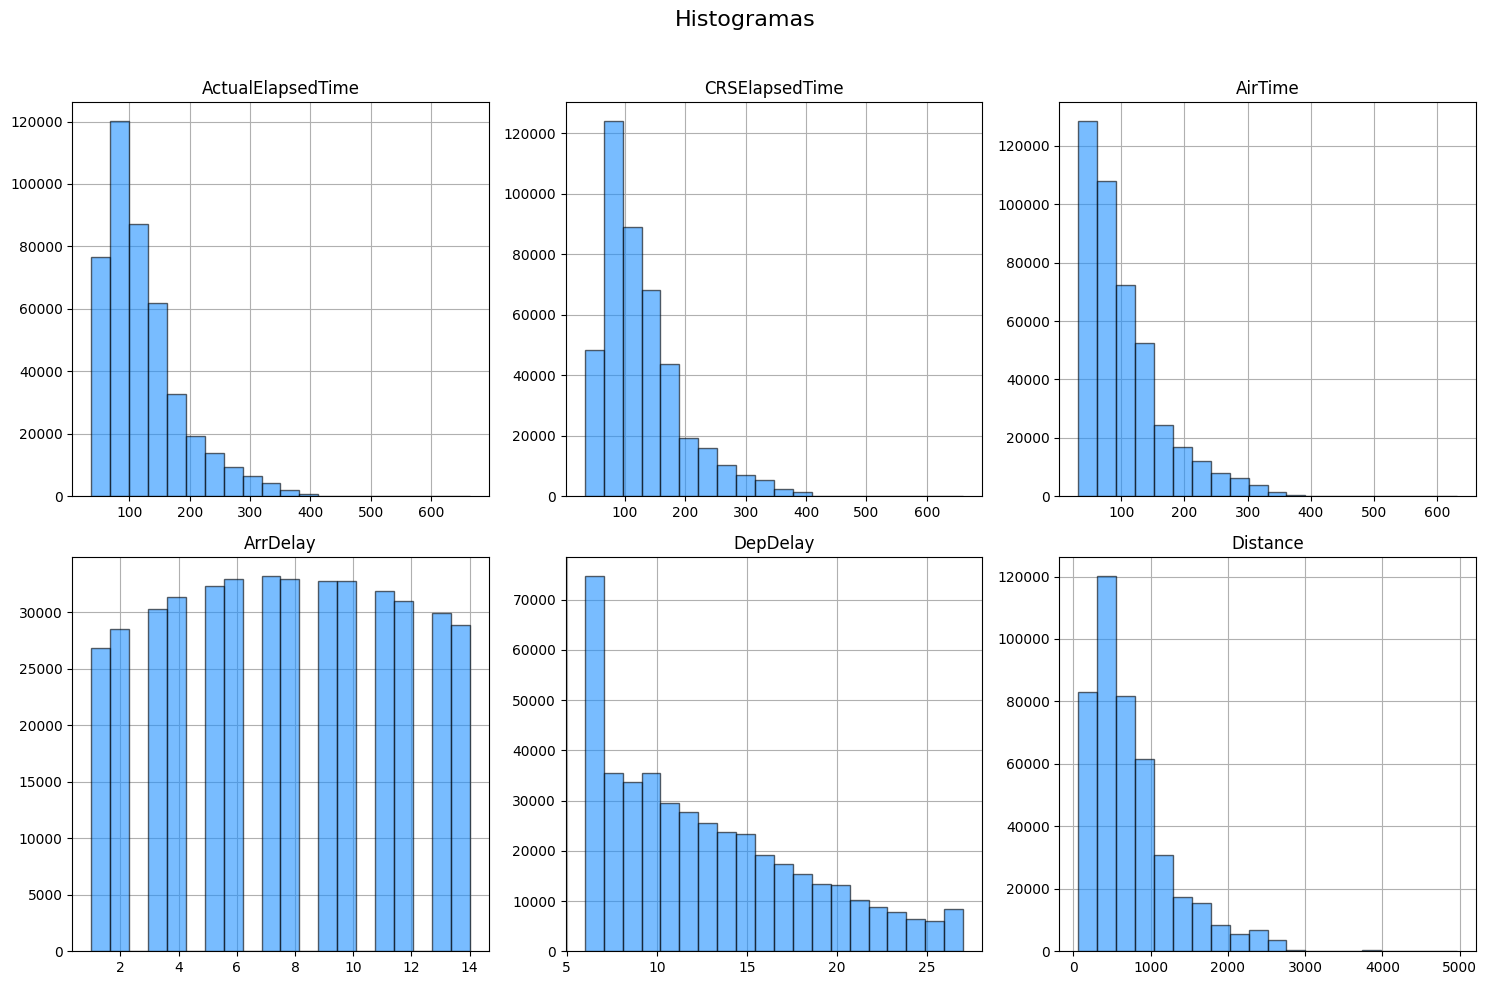

In [47]:
# Criação do grid de subgráficos 4x4
fig, axs = plt.subplots(2, 3, figsize=(15, 10))


for i, ax in zip(lista_var_continuas, axs.flatten()):
    df[i].hist(bins=20, edgecolor='black', alpha=0.6, color ='DodgerBlue',ax=ax, zorder=4)
    ax.set_title(f'{i}')
# Adiciona um título geral acima dos subgráficos
fig.suptitle('Histogramas', fontsize=16, zorder=1)  # Definindo zorder para o título geral

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajusta o espaço para acomodar o título geral

plt.show()

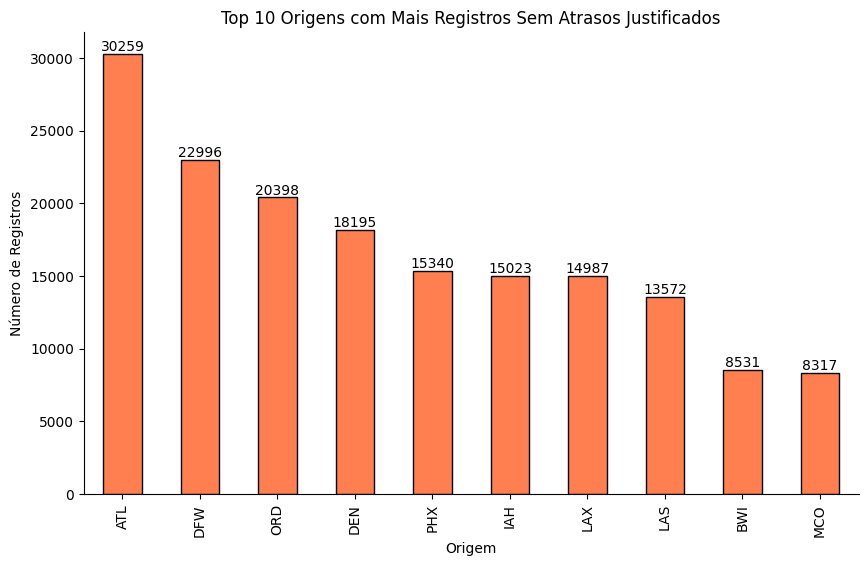

In [48]:
# Gráfico de barras para as 10 origens com mais registros
plt.figure(figsize=(10, 6))
df['Origin'].value_counts().nlargest(10).plot(kind='bar', color='coral', edgecolor='black', linewidth=1)

# Adicionar rótulos e título
plt.title('Top 10 Origens com Mais Registros Sem Atrasos Justificados')
plt.xlabel('Origem')
plt.ylabel('Número de Registros')

# Adicionar anotações com o número de registros em cada barra
for i, value in enumerate(df['Origin'].value_counts().nlargest(10)):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Remover a borda direita e superior do gráfico
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

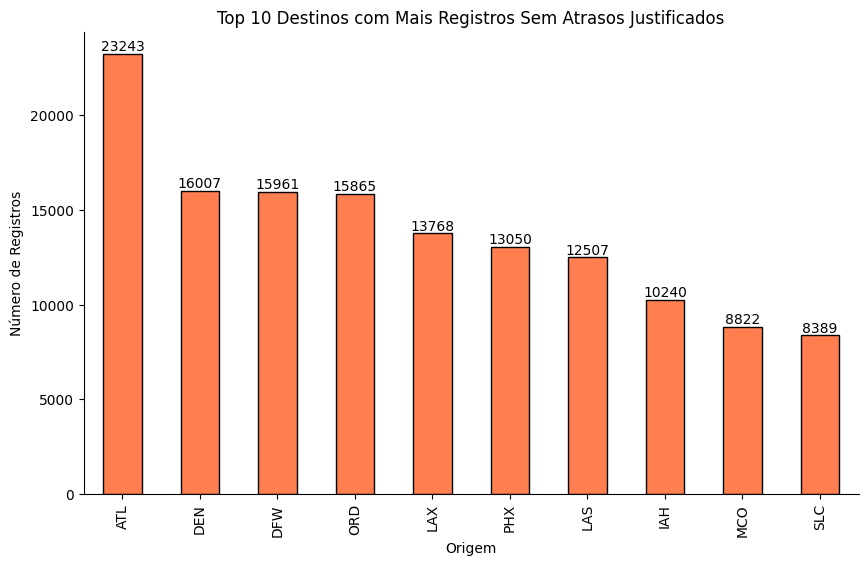

In [49]:
# Gráfico de barras para as 10 origens com mais registros
plt.figure(figsize=(10, 6))
df['Dest'].value_counts().nlargest(10).plot(kind='bar', color='coral', edgecolor='black', linewidth=1)

# Adicionar rótulos e título
plt.title('Top 10 Destinos com Mais Registros Sem Atrasos Justificados')
plt.xlabel('Origem')
plt.ylabel('Número de Registros')

# Adicionar anotações com o número de registros em cada barra
for i, value in enumerate(df['Dest'].value_counts().nlargest(10)):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

# Remover a borda direita e superior do gráfico
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

In [50]:
sem_atr_just = df['DayOfWeek'].value_counts(normalize=True)*100
print(sem_atr_just)

DayOfWeek
5    16.190139
4    15.190167
1    15.184886
7    14.591332
3    13.845083
2    13.118123
6    11.880270
Name: proportion, dtype: float64


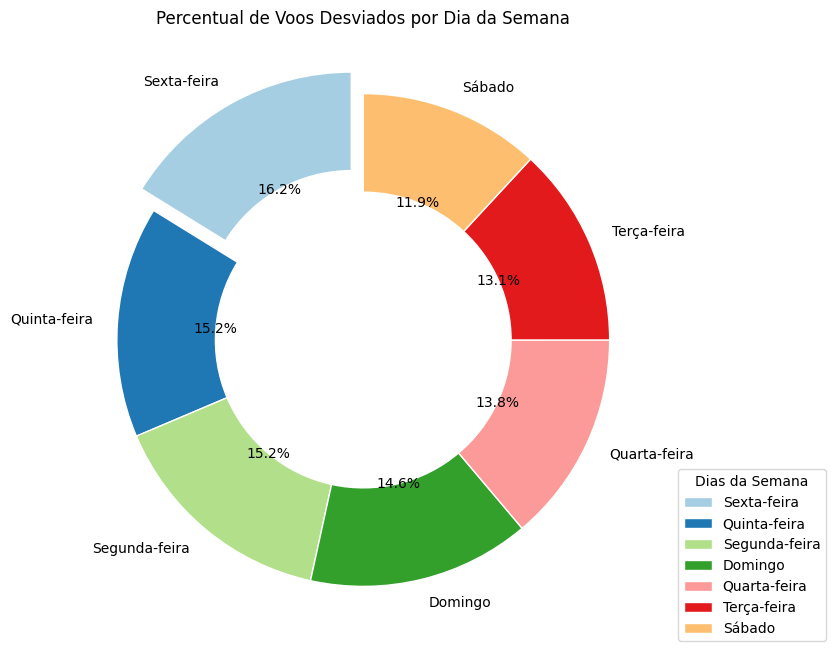

In [51]:
contagens_normalizadas = df['DayOfWeek'].value_counts(normalize=True) * 100

# Colocando na ordem apresentada no value_counts
dias_da_semana = ['Sexta-feira', 'Quinta-feira', 'Segunda-feira', 'Domingo','Quarta-feira', 'Terça-feira', 'Sábado']

# Criando o gráfico de pizza com algumas melhorias
plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0, 0, 0, 0)  # Destaca a primeira fatia
colors = plt.cm.Paired.colors

# Adicionando sombra e bordas às fatias
wedges, texts, autotexts = plt.pie(contagens_normalizadas, labels=dias_da_semana, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops=dict(width=0.4, edgecolor='w'))

# Adicionando uma legenda personalizada
plt.legend(wedges, dias_da_semana, title='Dias da Semana', loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))

# Adicionando título
plt.title('Percentual de Voos Desviados por Dia da Semana')

# Exibindo o gráfico
plt.show()